<a href="https://colab.research.google.com/github/engmohamedsalah/.NET-Backend-Developer-Roadmap/blob/master/alcamp_AI_CH2_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Acquisition**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [36]:
def read_data(path):
    data = pd.read_csv(path)
    return data

def clean_data(data):
    #drop id column
    data.drop('id', axis=1, inplace=True)
    data['clean_text'] = data['text'].apply(normalize_text)
    data['words'] = list(data['clean_text'].str.split())
    return data

**Data Preprocessing**

In [37]:
import re
import nltk
# Download the stopwords dataset if it hasn't been downloaded yet
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def normalize_text(text):
    """Normalizes text by converting to lowercase, removing punctuation,
    and replacing newline, tab, and carriage return characters with spaces.
    """
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation using regex
    text = re.sub(r'#', '', text)  # Remove hashtags
    text = re.sub(r'<[^>]+>', '', text)  #remove html tags
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation using regex
    text = text.replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')


    # Normalize the text by converting to lowercase, removing stopwords,
    #and applying stemming or lemmatization.
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    text = ' '.join(words)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
train_data = read_data('train.csv')
test_data = read_data('test.csv')

clean_train_data = clean_data(train_data)
clean_test_data = clean_data(test_data)

In [39]:
clean_train_data.head()

,keyword,location,text,target,clean_text,words
0,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,"[deed, reason, earthquake, may, allah, forgive..."
1,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,"[resident, asked, shelter, place, notified, of..."
3,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[13000, people, receive, wildfire, evacuation,..."
4,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."


**Feature Extraction**

Employ TF-IDF or word embeddings to convert text data into a numerical format that can be processed by machine learning models.


In [40]:
import sklearn.feature_extraction.text as text
from gensim.models import Word2Vec

def generate_word_embedings2(data, column):

    #X = vectorizer.fit_transform(data[column]) # Apply to the original data containing text
    tokenized_documents = [word_tokenize(doc.lower()) for doc in data[column]]

    # Train Word2Vec model
    w2v_model = Word2Vec(sentences=tokenized_documents, vector_size=100, window=10, min_count=1, workers=4)

    # Create document vectors by averaging word vectors
    def get_doc_vector(doc):
        vec = np.zeros(100)
        count = 0
        for word in doc:
            if word in w2v_model.wv:
                vec += w2v_model.wv[word]
                count += 1
        return vec / count if count > 0 else vec

    X_vec = [get_doc_vector(doc) for doc in tokenized_documents]
    data['embedings'] = X_vec
    return




In [41]:
import sklearn.feature_extraction.text as text
from sklearn.feature_extraction.text import TfidfVectorizer

def generate_word_embedings(data, column):
    vectorizer = TfidfVectorizer(stop_words = 'english',
    max_features = 500,
    ngram_range = (1, 2))
    X = vectorizer.fit_transform(data[column]) # Apply to the original data containing text
    X_vec = X.toarray()
    data['embedings'] = X_vec.tolist()
    return




In [42]:
generate_word_embedings(clean_train_data, 'clean_text') # Store the word embeddings in a new variable.
generate_word_embedings(clean_test_data, 'clean_text') # Store the word embeddings in a new variable.


In [43]:
clean_train_data.tail()

,keyword,location,text,target,clean_text,words,embedings
7608,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane holding bridge collapse nearby...,"[two, giant, crane, holding, bridge, collapse,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7609,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria_ahrary thetawniest control wild fire cali...,"[aria_ahrary, thetawniest, control, wild, fire...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7610,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5km volcano hawaii httptcozdtoyd8ebj,"[m194, 0104, utc5km, volcano, hawaii, httptcoz...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7611,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7612,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,latest home razed northern california wildfire...,"[latest, home, razed, northern, california, wi...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [64]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np # Import numpy

# Assuming 'embedings' column contains list of embeddings and 'target' is the target column
X = clean_train_data['embedings'].to_list() # Convert the 'embedings' column to a list of lists
X = np.array(X) # Convert the list of lists to a NumPy array
y = clean_train_data['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=43)

In [84]:
# Define the model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5904 - loss: 0.6626 - val_accuracy: 0.7793 - val_loss: 0.5030
Epoch 2/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7871 - loss: 0.4758 - val_accuracy: 0.7898 - val_loss: 0.4570
Epoch 3/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8210 - loss: 0.4119 - val_accuracy: 0.7903 - val_loss: 0.4543
Epoch 4/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8424 - loss: 0.3724 - val_accuracy: 0.7938 - val_loss: 0.4613
Epoch 5/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8454 - loss: 0.3719 - val_accuracy: 0.7916 - val_loss: 0.4692
Epoch 6/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8573 - loss: 0.3328 - val_accuracy: 0.7920 - val_loss: 0.4820
Epoch 7/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8791 - loss: 0.3016 - val_accuracy: 0.7846 - val_loss: 0.4948
Epoch 8/30
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8938 - loss: 0.2823 - val_accuracy: 0.7863 - val_loss: 0.5112
72

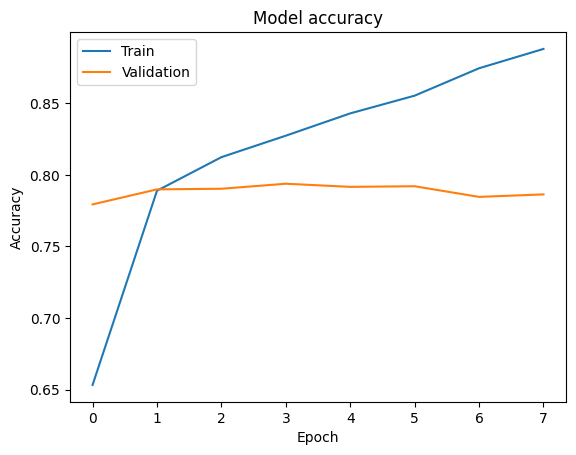

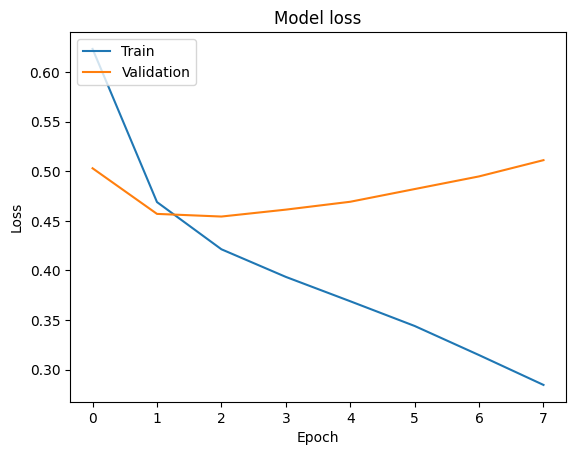

In [85]:

import matplotlib.pyplot as plt

# Assuming 'history' object contains the training history from model.fit
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


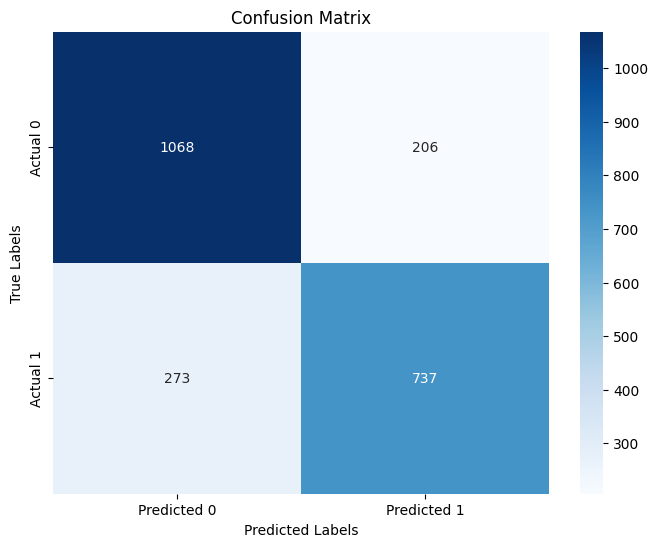

In [86]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions on the validation set
y_pred = model.predict(X_val)
y_pred_classes = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels

# Compute the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [77]:
import sklearn.model_selection as model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.89      0.84      3068
           1       0.82      0.69      0.75      2261

    accuracy                           0.80      5329
   macro avg       0.81      0.79      0.79      5329
weighted avg       0.81      0.80      0.80      5329

